# **Homework 11 - Federico Berto**

In [2]:
# Importing useful libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.regressionplots import abline_plot
from IPython.display import display, Math

## Exercise 12.1.6

a) Given that $Y_i \sim N(\beta_0 + \beta_1 x_i, \sigma^2)$, then
$$E(20) = \beta_0 + \beta_1 x_i = 123 + 20 \times  (-2.16) = 79.8$$

b) The change is:
$$E(30) - E(20) = \beta_0 + \beta_1 x_j - (\beta_0 + \beta_1  x_k) = -2.16 \times 10 = -21.6$$

c) Given the $Y_i$ follows a normal distribution, then we have
$$P(N(\beta_0 + \beta_1 \times 25, \sigma^2) \leq 60)= 0.0141$$ 

In [2]:
# Parameters
mu = 123 + 25 * (-2.16)
sigma = 4.1
purity_level = 60

# Calculate the CDF
cdf = norm.cdf(purity_level, loc=mu, scale=sigma)

# Result
print('Probability: {:.4f}'.format(cdf))

Probability: 0.0141


d) $$P(30 \leq N(\beta_0 + \beta_1 \times 25, \sigma^2) \leq 40)= 0.7428$$ 

In [3]:
# Parameters
mu = 123 + 40 * (-2.16)
sigma = 4.1
purity1, purity2 = 30, 40

# Calculate the CDF
cdf = norm.cdf(purity2, loc=mu, scale=sigma) - norm.cdf(purity1, loc=mu, scale=sigma) 

# Result
print('Probability: {:.4f}'.format(cdf))

Probability: 0.7428


e) $$P(N(\beta_0 + \beta_1 \times 30, \sigma^2) \leq N(\beta_0 + \beta_1 \times 27.5, \sigma^2))= 0.8242$$ 
We can calculate this by having as a new random variable the difference between the means and a new variance according to the variance properties

In [4]:
# Parameters 
# We calculate the parameters first
mu = 123 + 30 * (-2.16) - (123 + 27.5 * (-2.16))
sigma = math.sqrt(2*4.1**2)

# Calculate the CDF
cdf = norm.cdf(0, loc=mu, scale=sigma)
# Result
print('Probability: {:.4f}'.format(cdf))

Probability: 0.8242


## Exercise 12.2.4

We load the data into Python

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     138.3
Date:                Tue, 01 Dec 2020   Prob (F-statistic):           1.21e-08
Time:                        14:03:42   Log-Likelihood:                -130.11
No. Observations:                  16   AIC:                             264.2
Df Residuals:                      14   BIC:                             265.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2277.0694    765.499     -2.975      0.0

/home/fedebotu/.local/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


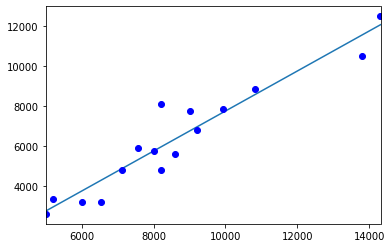

In [3]:
# Data loader
data = pd.read_excel('DS12.2.1.xls')
x = data.iloc[:, 0].to_numpy()
y = data.iloc[:, 1].to_numpy()

# Data fitting
fit = ols('y~x', data).fit()
print(fit.summary())

# Plots
abline_plot(model_results=fit)
plt.plot(x, y, 'bo')
plt.show()

Based on the table, we get the following results:

a) Fitted parameters: $\hat{\beta}_0 = -2277.0694, \hat{\beta}_1 =  1.0033$

b) The cost increase for each 1000 feet is: $1.0033 \times 1000 = 1003.3$

c) The for a depth of 10,000 feet would be $-2277.0694 + 1.0033 \times 10000 = 7.756$ million USD

d) The error variance can be calculated as following by Python:

In [29]:
# Parameters
beta_0 = -2277.0694
beta_1 = 1.0033

# Calculations
Sum_y2 = 0
for i in range(len(x)):
    Sum_y2 += y[i] ** 2
Sum_y = 0
for i in range(len(x)):
    Sum_y += y[i]
Sum_xy = 0
for i in range(len(x)):
    Sum_xy += x[i] * y[i]
SSE = Sum_y2 - beta_0 * Sum_y - beta_1 * Sum_xy
sigma2 = SSE / (len(x)-2)

# Results
display(Math(r'\hat \sigma^2 = {:.0f}'.format(sigma2)))

<IPython.core.display.Math object>

e) Using the table we get $-2277.0694 + 1.0033 \times 20000 = 17.7889$ million USD. However, due to the limited size of the fitted data and that the data fitted are much smaller than 20000, the model should be considered inaccurate in this case.

## Exercise 12.2.10

We want to manually fit the data set. The parameters can be calculated as following:
$$\hat{\beta}_1 = \frac{S_{xy}}{S_{xx}} = \frac{ \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{\sum_{i=1}^n(x_i - \bar{x})}$$
$$\hat{\beta}_0 = \hat{\beta}_1 \bar{x}$$

The SSE and $\sigma^2$ are respectively:
$$SSE = \sum_{i=1}^n (y_i - \hat{y})^2$$
$$\sigma^2 = \frac{SSE}{n-2}$$

We can calculate by Python:

In [6]:
# Parameters
n = 20
sum_x = 8.552
sum_y = 398.2
sum_x2 = 5.196
sum_y2 = 9356
sum_xy = 216.6

# Calculations
x_bar = sum_x / n
y_bar = sum_y / n
beta_1 = (sum_xy - n * x_bar * y_bar) / (sum_x2 - n * x_bar ** 2)
beta_0 = y_bar - beta_1 * x_bar
sse = sum_y2 - beta_0 * sum_y - beta_1 * sum_xy
sigma2 = sse / (n - 2)

# Results
display(Math(r'\beta_0 = {:.4f}'.format(beta_0)))
display(Math(r'\beta_1 = {:.4f}'.format(beta_1)))
display(Math(r'\sigma^2 = {:.4f}'.format(sigma2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

If $x  = 0.5$ then we get $7.039 + 30.1 \times 0.5 = 22.09$

## Exercise 12.3.2

a) The confidence interval $100(1-\alpha)$ for $\beta_1$ will be:
$$\left( \hat{\beta} - t_{\frac{a}{2}, n-2} \frac{\hat{\sigma}}{\sqrt{S_{xx}}},  \hat{\beta} + t_{\frac{a}{2}, n-2} \frac{\hat{\sigma}}{\sqrt{S_{xx}}} \right)$$
where
$$s.e.(\beta) = \frac{\hat{\sigma}}{\sqrt{S_{xx}}}$$
We use Python to calculate it:

In [31]:
# Parameters
n = 22
alpha = 0.05
beta_hat = 56.33
beta_se = 3.78

# Calculations
df = n-2
critical = t.ppf(1-alpha/2, df)
left = beta_hat - critical * beta_se
right = beta_hat + critical * beta_se

# Printing
print('Critical point: {:.4f}'.format(critical))
print('95% Confidence Interval: ({:.2f}, {:.2f})'.format(left, right))

Critical point: 2.0860
95% Confidence Interval: (48.45, 64.21)


b) We calculate the t-statistic and we get the $p-value$:

In [38]:
t_stat = (56.33 - 50) / 3.78
p_value = t.sf(t_stat, df=df)
print('p-value: {:.4f}'.format(2*p_value))

p-value: 0.1096


## Exercise 12.3.8

a) We load the data into Python first and generate the table:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     156.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           1.74e-11
Time:                        00:21:21   Log-Likelihood:                -49.589
No. Observations:                  24   AIC:                             103.2
Df Residuals:                      22   BIC:                             105.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8639      4.555      2.824      0.0

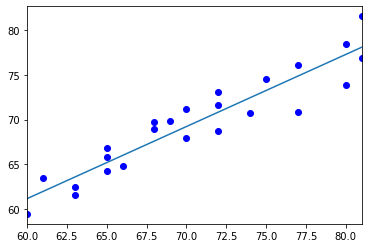

In [9]:
# Data loader
data = pd.read_excel('DS12.2.6.xls')
x = data.iloc[:, 0].to_numpy()
y = data.iloc[:, 1].to_numpy()

# Data fitting
fit = ols('y~x', data).fit()
print(fit.summary())

# Plots
abline_plot(model_results=fit)
plt.plot(x, y, 'bo')
plt.show()

We can see from the table that the standard error for $\hat{\beta}_1$ is $0.064$. 

b) We use Python to calculate the confidence interval:

In [10]:
# Parameters
n = 24
alpha = 0.01
beta_hat = 0.8051
beta_se = 0.0643

# Calculations
df = n-2
critical = t.ppf(1-alpha/2, df)
left = beta_hat - critical * beta_se
right = beta_hat + critical * beta_se

# Printing
print('Critical point: {:.4f}'.format(critical))
print('99% Confidence Interval: ({:.2f}, {:.2f})'.format(left, right))

Critical point: 2.8188
99% Confidence Interval: (0.62, 0.99)


c) We calculate the $p-value$ by first calculating the t-statistics:

In [39]:
t_stat = (0.8051 - 0) / 0.0643
p_value = t.sf(t_stat, df=df)
print('p-value: {:.4f}'.format(2*p_value))

p-value: 0.0000


## Exercise 12.4.2

We calculate the mean response at $x_0$, $E(Y_{x_0})$ given the following T-statistics:
$$T=\frac{ \hat{y}_{x_0} - \mu_{x_0} }{ \hat{\sigma} \sqrt{ \frac{1}{n} + \frac{ (x_0 -\bar{x})^2}{S_{xx}} }}$$
A $100(1-\alpha)$ confidence interval can be obtained as following:
$$\hat{y}_{x_0} \pm t_{\frac{\alpha}{2}, n-2} \hat{\sigma} \sqrt{ \frac{1}{n} + \frac{ (x_0 - \bar{x})^2 }{S_{xx}} }$$

We construct the two sided 95% confidence interval in Python as following:

In [12]:
# Parameters
n = 17
df = n-2
alpha = 0.05
beta_1 = 34.60
beta_0 = 12.08
x0 = 40
x_bar = 53.2
sigma2 = 17.65
Sxx = 1096

# Calculations
temp = math.sqrt(1/n + (x0 - x_bar)**2/Sxx)
sigma = math.sqrt(sigma2)
critical = t.ppf(1-alpha/2, df)
y_se = critical*sigma*temp
yhat_x0 = beta_0 + beta_1*x0 # Prediction
left = yhat_x0 - y_se
right = yhat_x0 + y_se

# Printing
print('Critical point: {:.4f}'.format(critical))
print('{:.0f}% Confidence Interval: ({:.2f}, {:.2f})'.format((1-alpha)*100, left, right))

Critical point: 2.1314
95% Confidence Interval: (1391.90, 1400.26)


## Exercise 12.4.8

We load the data into Python first:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     156.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           1.74e-11
Time:                        00:21:22   Log-Likelihood:                -49.589
No. Observations:                  24   AIC:                             103.2
Df Residuals:                      22   BIC:                             105.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8639      4.555      2.824      0.0

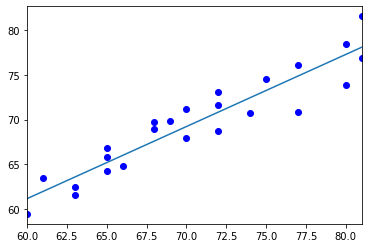

In [13]:
# Data loader
data = pd.read_excel('DS12.2.6.xls')
x = data.iloc[:, 0].to_numpy()
y = data.iloc[:, 1].to_numpy()

# Data fitting
fit = ols('y~x', data).fit()
print(fit.summary())

# Plots
abline_plot(model_results=fit)
plt.plot(x, y, 'bo')
plt.show()

We calculate the mean response at $x_0$, $E(Y_{x_0})$ given the following T-statistics:
$$T=\frac{ \hat{y}_{x_0} - \mu_{x_0} }{ \hat{\sigma} \sqrt{ \frac{1}{n} + \frac{ (x_0 -\bar{x})^2}{S_{xx}} }}$$
A $100(1-\alpha)$ confidence interval can be obtained as following:
$$\hat{y}_{x_0} \pm t_{\frac{\alpha}{2}, n-2} \hat{\sigma} \sqrt{ \frac{1}{n} + \frac{ (x_0 - \bar{x})^2 }{S_{xx}} }$$

In [14]:
# Data
x = data['Temperature (Degrees F)'].to_numpy() # x
y = data['Resistance (Ohms)'].to_numpy() # y

In [15]:
# Parameters
n = len(x)
df = n-2
alpha = 0.01
beta_1 = 0.8051
beta_0 = 12.8639
x0 = 70

# Calculations
x_bar = x.mean()

# Obtain the SSE
SSE = 0
for i in range(n):
    SSE += (y[i] -beta_0 - beta_1*x[i])**2

# Obtain Sxx
Sxx = 0
for i in range(n):
    Sxx += (x[i] - x_bar)**2
temp = math.sqrt(1/n + (x0 - x_bar)**2/Sxx)

sigma = math.sqrt(SSE/(n-2))
critical = t.ppf(1-alpha/2, df)
y_se = critical*sigma*temp
yhat_x0 = beta_0 + beta_1*x0 # Prediction
left = yhat_x0 - y_se
right = yhat_x0 + y_se

# Printing
print('Critical point: {:.4f}'.format(critical))
print('99% Confidence Interval: ({:.2f}, {:.2f})'.format(left, right))

Critical point: 2.8188
99% Confidence Interval: (68.07, 70.37)


## Exercise 12.5.4

We load the data into Python first:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     6.939
Date:                Mon, 30 Nov 2020   Prob (F-statistic):             0.0168
Time:                        00:21:22   Log-Likelihood:                -67.808
No. Observations:                  20   AIC:                             139.6
Df Residuals:                      18   BIC:                             141.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.2181      6.184      8.767      0.0

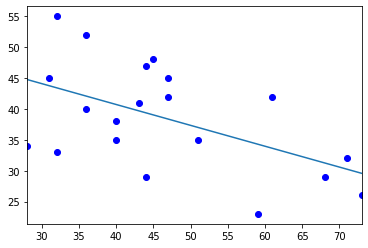

In [16]:
# Data loader
data = pd.read_excel('DS12.2.3.xls')
x = data.iloc[:, 1].to_numpy() 
y = data.iloc[:, 0].to_numpy() # The predictions are actually the first column

# Data fitting
fit = ols('y~x', data).fit()
print(fit.summary())

# Plots
abline_plot(model_results=fit)
plt.plot(x, y, 'bo')
plt.show()

We predict the interval for a single response $Y_{x_0}^{new}$ at $x_0$ given the following T-statistics:
$$T=\frac{ Y_{x_0}^{new} - \hat{y}_{x_0} }{ \hat{\sigma} \sqrt{ 1 + \frac{1}{n} + \frac{ (x_0 -\bar{x})^2}{S_{xx}} }}$$
A $100(1-\alpha)$ confidence interval for a single response $Y_{x_0}^{new}$ can be obtained as following:
$$\hat{y}_{x_0} \pm t_{\frac{\alpha}{2}, n-2} \hat{\sigma} \sqrt{1+ \frac{1}{n} + \frac{ (x_0 - \bar{x})^2 }{S_{xx}} }$$

In [17]:
# Data
x = data['Age'].to_numpy() # x
y = data['VO2-max'].to_numpy() # y

In [18]:
# Parameters
n = len(x)
df = n-2
alpha = 0.05
beta_0 = 54.2181
beta_1 = -0.3377
x0 = 50

# Calculations
x_bar = x.mean()

# Obtain the SSE
SSE = 0
for i in range(n):
    SSE += (y[i] -beta_0 - beta_1*x[i])**2

# Obtain Sxx
Sxx = 0
for i in range(n):
    Sxx += (x[i] - x_bar)**2
temp = math.sqrt(1 + 1/n + (x0 - x_bar)**2/Sxx)

sigma = math.sqrt(SSE/(n-2))
critical = t.ppf(1-alpha/2, df)
y_se = critical*sigma*temp
yhat_x0 = beta_0 + beta_1*x0 # Prediction
left = yhat_x0 - y_se
right = yhat_x0 + y_se

# Printing
print('Critical point: {:.4f}'.format(critical))
print('{:.0f}% Confidence Interval: ({:.2f}, {:.2f})'.format((1-alpha)*100, left, right))

Critical point: 2.1009
95% Confidence Interval: (21.01, 53.66)


## Exercise 12.5.10

We can solve the problem in Python as following to get the $95%$ confidence interval as per the formulas we explained in previous exercises:

In [19]:
# Parameters
n = 30
df = n-2
alpha = 0.05
beta_0 = 51.98
beta_1 = 3.44
x0 = 22 # New value

# Calculate x_bar
x_bar = 603.36/n

# Calculate Sxx
Sxx = 12578.22 - 603.36**2/(n)

# Calculate Sigma
sigma = math.sqrt(329.77/(n-2))

# Final calculations
temp = math.sqrt(1 + 1/n + (x0 - x_bar)**2/Sxx)
critical = t.ppf(1-alpha/2, df)
y_se = critical*sigma*temp
yhat_x0 = beta_0 + beta_1*x0 # Prediction
left = yhat_x0 - y_se
right = yhat_x0 + y_se

# Printing
print('Critical point: {:.4f}'.format(critical))
print('{:.0f}% Confidence Interval: ({:.2f}, {:.2f})'.format((1-alpha)*100, left, right))

Critical point: 2.0484
95% Confidence Interval: (120.49, 134.83)


## Exercise 12.6.6

We can print the results with the ANOVA able by Python:

In [20]:
# Data loader
data = pd.read_excel('DS12.2.2.xls')
x = data.iloc[:, 1].to_numpy()
y = data.iloc[:, 0].to_numpy()

# Data processing
data = pd.DataFrame({'x': x, 'y': y})

# Fit the model
model = ols("y ~ x", data).fit()

# Print the summary
print(model.summary())

# Anova table
anova_results = anova_lm(model)
print('\nANOVA results')
print(anova_results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.245
Date:                Mon, 30 Nov 2020   Prob (F-statistic):              0.291
Time:                        00:21:22   Log-Likelihood:                -41.453
No. Observations:                  12   AIC:                             86.91
Df Residuals:                      10   BIC:                             87.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.1935     16.952      2.135      0.0

/home/fedebotu/.local/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


The coefficient of determination can be calculated as:
$$R^2 = \frac{SSR}{SST} = \frac{87.589}{703.328 + 87.589} = 0.1107$$

We can verify that the F-statistics is the square of the t-statistics. By the OLS regression results we get $t = 1.116 \Longrightarrow t^2 = 1.2454 = F$. 

The $p-value$ is large; thus the evidence to conclude that on average the truck takes more time to be unloaded when the temperature is higher is insufficient.